In [7]:
import geopandas as gpd
from shapely.geometry import Polygon
import requests
import json


In [4]:
r = requests.get(r'http://seshatdatabank.info/databrowser/js/dacura-seshat.js')

In [9]:
resp = r.text
resp

'/*\n * Gathers togther all the javascript functionality that is specific to the seshat / dacura site. \n */\n\n\n//map code\n//map coordinates\n\nvar cambodia = [\n\t{lat: 13.50649, lng: 104.22104},\n\t{lat: 13.59694, lng: 104.10002},\n\t{lat: 13.68727, lng: 103.26638},\n\t{lat: 13.6535, lng: 103.25673},\n\t{lat: 13.38027, lng: 103.36375},\n\t{lat: 13.2194, lng: 103.69592},\n\t{lat: 13.2646, lng: 103.73017},\n\t{lat: 13.18292, lng: 104.04667},\n\t{lat: 12.76198, lng: 104.2214},\n\t{lat: 12.73885, lng: 104.43785},\n\t{lat: 12.53967, lng: 104.4472},\n\t{lat: 12.52852, lng: 104.62766},\n\t{lat: 12.15401, lng: 104.72476},\n\t{lat: 12.13903, lng: 104.78889},\n\t{lat: 12.90435, lng: 105.08964}\n];\n\nvar cuzcoMap = [\n\t{lat: -13.2005, lng: -72.54487},\n\t{lat: -13.27169, lng: -72.75172},\n\t{lat: -13.43904, lng: -72.78279},\n\t{lat: -13.59777, lng: -72.53303},\n\t{lat: -13.78648, lng: -72.14447},\n\t{lat: -13.9856, lng: -72.05832},\n\t{lat: -13.98208, lng: -71.57117},\n\t{lat: -13.88441, l

In [41]:
store = []
for x in resp.split(r'var')[1:31]:
    name = x.split('=')[0].strip()
    j = x.split('=')[1].strip()[:-1].replace('lat', '"lat"').replace('lng', '"lng"')
    geo = json.loads(j)
    coords = [[x['lng'], x['lat']] for x in geo]
    poly = Polygon(coords)
    row = {
        'name': name,
        'geometry': poly
    }
    store.append(row)
    print(name)

cambodia
cuzcoMap
upperEgypt
hawaii
icelandMap
latiumMap
niger
yellowValley
ghanaianCoast
parisBasin
lenaRiverValley
orkhonValley
sogdianaMap
yemeniCoastalPlain
konyaPlain
susianaMap
garoHills
deccanMap
kachiPlain
kapuasiBasin
centralJava
southChinaHills
kansaiMap
fingerLakes
cahokiaMap
oaxaca
lowlandAndes
northColombia
oroPNG
chuukIslands


In [50]:
df = gpd.GeoDataFrame(store, geometry='geometry', crs={'init': 'EPSG:4326'})

/home/sandy/anaconda3/envs/geo/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


ImportError: The descartes package is required for plotting polygons in geopandas. You can install it using 'conda install -c conda-forge descartes' or 'pip install descartes'.

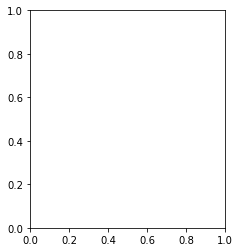

In [51]:
df.plot()

In [52]:
df.to_file('poly.shp')